# Analyzing Fitbit Data in iPython

Using the Fitbit Python library I downloaded the Fitbit activity, calorie and weight data. This notebook then analyzes the data as a way to learn about iPython.

In [40]:
# This is required to get plots to display inline
%matplotlib inline
# Additional setup
%cd /Users/dane/src/fitbit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dane=pd.read_csv('/Users/dane/src/fitbit/dane.csv')
cindy=pd.read_csv('/Users/dane/src/fitbit/cindy.csv')

/Users/dane/src/fitbit


In [3]:
cindy.tail()

,distance,steps,weight,active1,active2,active3,sedentary,calories,actcal,biking,date,month,year,user
1107,6.94,14876,136.1,165,69,35,1171,1983,940,0,2015-12-27,12,2015,cindy
1108,7.87,16880,0.0,126,87,49,1178,2048,997,0,2015-12-28,12,2015,cindy
1109,9.27,19881,0.0,95,94,62,1189,2117,1056,0,2015-12-29,12,2015,cindy
1110,10.67,22843,0.0,111,107,85,1137,2295,1281,0,2015-12-30,12,2015,cindy
1111,8.11,17387,0.0,256,67,38,1079,2170,1207,0,2015-12-31,12,2015,cindy


In [4]:
dane.tail()

,distance,steps,weight,active1,active2,active3,sedentary,calories,actcal,biking,date,month,year,user
1151,7.88,16098,159.3,137,84,41,1178,2507,1235,0,2015-12-27,12,2015,dane
1152,8.29,16935,0.0,137,87,49,1167,2566,1303,0,2015-12-28,12,2015,dane
1153,9.46,19323,0.0,97,103,58,1182,2628,1348,0,2015-12-29,12,2015,dane
1154,7.30,14914,0.0,81,80,51,1228,2439,1108,0,2015-12-30,12,2015,dane
1155,8.33,17019,0.0,207,73,36,1124,2653,1435,0,2015-12-31,12,2015,dane


In [5]:
print('Average distance per day was {:3.1f}/{:3.1f} miles for dane/cindy'.format(np.average(dane['distance']),np.average(cindy['distance'])))

Average distance per day was 7.8/7.7 miles for dane/cindy


In [6]:
print('The most steps in a day was: {}/{} for dane/cindy'.format(max(dane['steps']), max(cindy['steps'])))

The most steps in a day was: 43958/44847 for dane/cindy


In [7]:
# number of days with weight
non_zero_days = dane[dane.weight!=0]
#print('Average weight over the quarter was: {}'.format(np.average(non_zero_days)))
nzd2015 = non_zero_days[non_zero_days.date >= '2015-01-01']
print('Average weight over the year was: {}'.format(np.average(nzd2015.weight)))

Average weight over the year was: 158.13671497584542


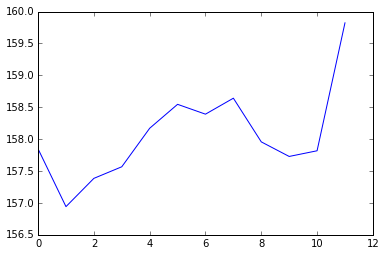

In [8]:
# look at this by month
nzd_month = nzd2015.groupby('month')
p=plt.plot(nzd_month.agg(np.mean)['weight'])

In [9]:
# Basic Stats
for n, i in [('Cindy', cindy), ('Dane', dane)]:
    print('{}'.format(n.title()))
    print('  Average steps: {:,}'.format(int(np.average(i['steps']))))
    print('  Total steps: {:,}'.format(sum(i['steps'])))
    #print('Average for month {} is {}'.format(i,np.average(fbdata[fbdata.month==i]['steps'])))

Cindy
  Average steps: 16,393
  Total steps: 18,230,062
Dane
  Average steps: 16,084
  Total steps: 18,593,348


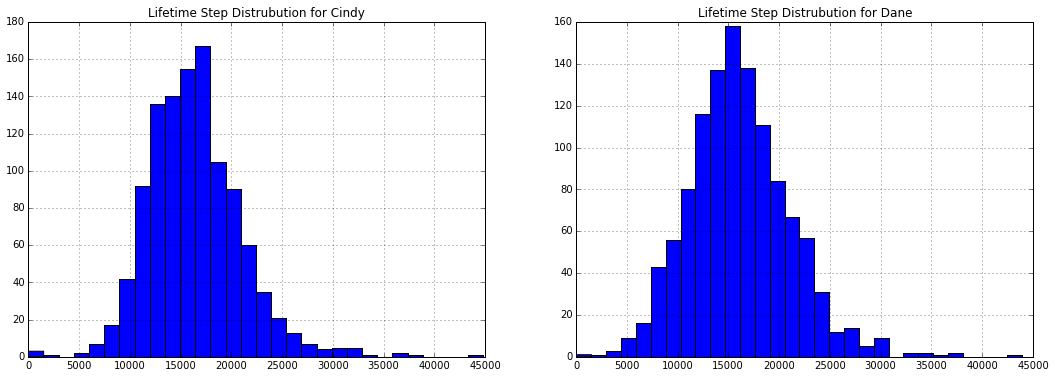

In [10]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(121) # numrows, numcols, fignum
cindy['steps'].hist(bins=30)
plt.title('Lifetime Step Distrubution for Cindy')
plt.subplot(122)
dane['steps'].hist(bins=30)
plt.title('Lifetime Step Distrubution for Dane')
plt.show()


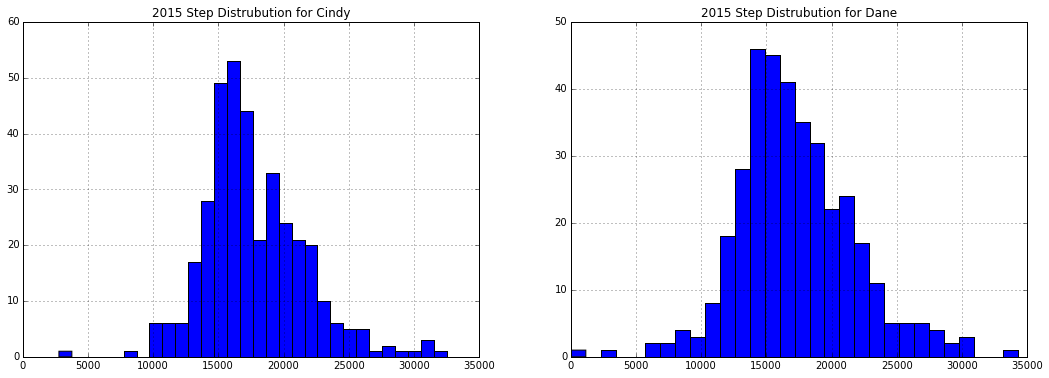

In [11]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(121) # numrows, numcols, fignum
cindy[cindy.year==2015]['steps'].hist(bins=30)
plt.title('2015 Step Distrubution for Cindy')
plt.subplot(122)
dane[dane.year==2015]['steps'].hist(bins=30)
plt.title('2015 Step Distrubution for Dane')
plt.show()


In [12]:
# Basic Stats
for n, i in [('Cindy', cindy), ('Dane', dane)]:
    print('{}'.format(n.title()))
    for y in [2013, 2014, 2015]:
        d = i[i.year == y]
        print('  Average steps for {}: {:,}'.format(y, int(np.average(d['steps']))))


Cindy
  Average steps for 2013: 13,820
  Average steps for 2014: 17,735
  Average steps for 2015: 17,715
Dane
  Average steps for 2013: 13,691
  Average steps for 2014: 18,049
  Average steps for 2015: 17,234


In [13]:
# estimate days remaining to 10K miles

# use 2015 averages to compute steps_per_mile
c15 = cindy[cindy.year == 2015]
steps_per_mile = sum(c15.steps) / sum(c15.distance)
steps_to_date = sum(cindy.steps)
miles_to_date = round(sum(cindy.distance),1)
steps_left = int((10000 - miles_to_date) * steps_per_mile)
average_steps_per_day = 17700
days_left = int(steps_left / average_steps_per_day + 0.5)
print('With {:,} miles so far in {:,} steps,'.format(miles_to_date, steps_to_date))
print('Cindy has {:,} steps left to get to 10K miles which will take an estimated {} days'.format(steps_left, days_left))

With 8,525.9 miles so far in 18,230,062 steps,
Cindy has 3,150,068 steps left to get to 10K miles which will take an estimated 178 days


In [47]:
cindy15 = cindy[cindy.year==2015]
cindy15.head(1)

,distance,steps,weight,active1,active2,active3,sedentary,calories,actcal,biking,date,month,year,user
747,6.25,13415,135.6,91,88,25,1236,1860,761,0,2015-01-01,1,2015,cindy


In [48]:
min(cindy15.date)

'2015-01-01'

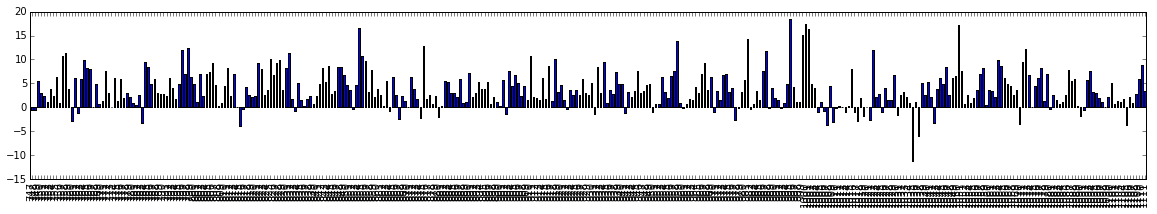

In [49]:
ou = (cindy15.steps - 14000)/1000
fig = plt.gcf()
fig.set_size_inches(20,3)
ou.plot(kind='bar')


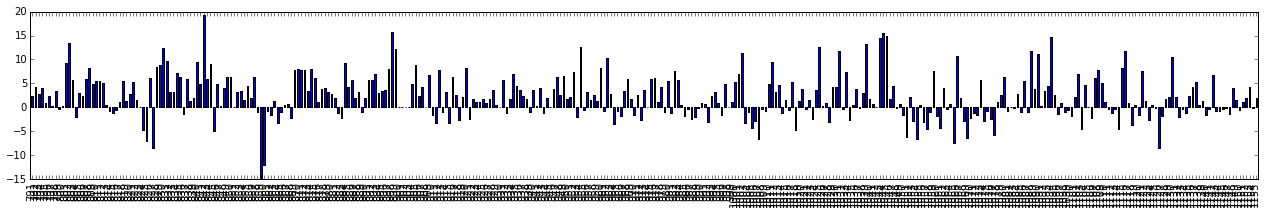

In [50]:
dane15 = dane[i.year==2015]
ou = (dane15.steps - 15000)/1000
fig = plt.gcf()
fig.set_size_inches(22,3)
ou.plot(kind='bar')

In [53]:
missed = cindy15[cindy15.steps < 15000]
print('Cindy was below 15K steps on {} days'.format(len(missed)))
print('Dane was below 15K steps pn {} days'.format(len(dane15[dane15.steps < 15000])))

Cindy was below 15K steps on 82 days
Dane was below 15K steps pn 118 days


In [45]:
x=cindy[cindy.year==2015]


In [46]:
len(x)

365

/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


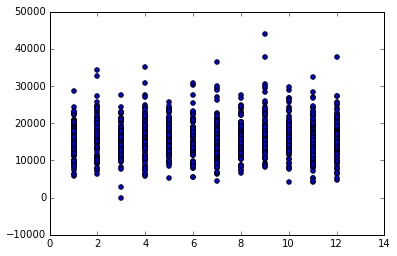

In [56]:
plt.scatter(x=dane.month, y=dane.steps)